Import Modules

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
tf.random.set_seed(51)
np.random.seed(51)
from sklearn.preprocessing import StandardScaler
from datetime import datetime

Saving Data after EV.csv to Data after EV.csv


Loading the Data

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Data after EV.csv']))
df = df.drop(df.columns[[0,3,4,5,6,7]], axis = 1).rename(columns = {"Total_y": "Total EV Sales"})
df.head()

,Year,State,Total EV Sales,Gasoline Price,Median Income,Population,Renewable Energy Use,Total Energy Use,Transportation Energy Use,Stations Opened,Lithium Price
0,2011,AR,22,27.86,23039.0,2941038.0,124987.0,47928.0,284546.0,18.0,946
1,2011,IL,328,28.71,32857.0,12867783.0,313512.0,142886.0,985537.0,11.0,946
2,2011,IN,94,27.74,29475.0,6517250.0,222942.0,105818.0,581270.0,5.0,946
3,2011,IA,49,28.21,28663.0,3066772.0,668883.0,45655.0,307194.0,18.0,946
4,2011,LA,27,27.68,26312.0,4576244.0,112139.0,86369.0,622556.0,3.0,946


In [ ]:
tgitprint(df.shape)
df.dropna(inplace=True)
for column in df.columns[3:]:
    ssc = StandardScaler()
    df[[column]] = ssc.fit_transform(df[[column]].values)
df["Year"] = pd.to_datetime(df["Year"], format = "%Y")
df = df.set_index("Year")
grouped = df.groupby(['State'])
df.head()

(88, 11)


,State,Total EV Sales,Gasoline Price,Median Income,Population,Renewable Energy Use,Total Energy Use,Transportation Energy Use,Stations Opened,Lithium Price
Year,,,,,,,,,,
2011-01-01,AR,22,0.984485,-0.797535,-0.941687,-0.706267,-0.982078,-1.054992,-0.331605,1.773545
2011-01-01,IL,328,1.168556,1.542231,2.188170,0.298632,2.056967,2.051578,-0.672963,1.773545
2011-01-01,IN,94,0.958498,0.736253,0.185876,-0.184135,0.870639,0.259995,-0.965555,1.773545
2011-01-01,IA,49,1.060279,0.542742,-0.902044,2.192876,-1.054823,-0.954623,-0.331605,1.773545
2011-01-01,LA,27,0.945505,-0.017534,-0.426114,-0.774751,0.248192,0.442961,-1.063086,1.773545


In [ ]:
df.to_numpy()[:, 2:].shape

(80, 8)

In [ ]:
for df in grouped:
    x_index = df[1].index.year.to_numpy()
    x_value = df[1].iloc[:,4:].to_numpy()
    y_value = df[1]["Total EV Sales"].to_numpy()

    df[1].pop("State")
    dft = df[1].T.apply(pd.to_numeric)
    test_x = dft.pop('2018-01-01')
    train_x = dft.T
  
    test_y = test_x.pop("Total EV Sales")
    train_y = train_x.pop("Total EV Sales")

    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_shape=train_x.shape[1:], activation="relu"), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
    ])

    model.summary()
    model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(lr=1e-1))
    model.fit(train_x, train_y, epochs=10000, callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0.001,
    patience=20,
    restore_best_weights=True)])
    model.save(df[0])
    model.evaluate(tf.expand_dims(test_x, axis=0), tf.expand_dims(test_y, axis=0))


Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_219 (Dense)           (None, 64)                576       
                                                                 
 flatten_73 (Flatten)        (None, 64)                0         
                                                                 
 dense_220 (Dense)           (None, 16)                1040      
                                                                 
 dense_221 (Dense)           (None, 1)                 17        
                                                                 
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 388ms/step - loss: 14111.2227
Epoch 2/10000
1/1 [==============================] - 0s 12ms/step - loss: 13436.4131
Epoch 3/10000
1/1 [==============================] - 0s 16ms/step - loss: 11963.4111
Epoch 4/10000
1/1 [==============================] - 0s 11ms/step - loss: 9276.7695
Epoch 5/10000
1/1 [==============================] - 0s 12ms/step - loss: 5520.1782
Epoch 6/10000
1/1 [==============================] - 0s 11ms/step - loss: 1954.7723
Epoch 7/10000
1/1 [==============================] - 0s 10ms/step - loss: 2096.3425
Epoch 8/10000
1/1 [==============================] - 0s 12ms/step - loss: 4953.8242
Epoch 9/10000
1/1 [==============================] - 0s 15ms/step - loss: 3645.7869
Epoch 10/10000
1/1 [==============================] - 0s 16ms/step - loss: 1675.6490
Epoch 11/10000
1/1 [==============================] - 0s 10ms/step - loss: 1068.1693
Epoch 12/10000
1/1 [==============================] - 0s 8ms/step - loss: 1524.6133


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 385ms/step - loss: 84608.5000
Epoch 2/10000
1/1 [==============================] - 0s 15ms/step - loss: 82720.0234
Epoch 3/10000
1/1 [==============================] - 0s 12ms/step - loss: 77957.0234
Epoch 4/10000
1/1 [==============================] - 0s 11ms/step - loss: 69469.3750
Epoch 5/10000
1/1 [==============================] - 0s 9ms/step - loss: 56655.9297
Epoch 6/10000
1/1 [==============================] - 0s 10ms/step - loss: 39977.6758
Epoch 7/10000
1/1 [==============================] - 0s 13ms/step - loss: 22042.2617
Epoch 8/10000
1/1 [==============================] - 0s 12ms/step - loss: 9345.2607
Epoch 9/10000
1/1 [==============================] - 0s 14ms/step - loss: 13223.2705
Epoch 10/10000
1/1 [==============================] - 0s 7ms/step - loss: 26255.0508
Epoch 11/10000
1/1 [==============================] - 0s 10ms/step - loss: 24560.5039
Epoch 12/10000
1/1 [==============================] - 0s 7ms/step - loss: 15509

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 378ms/step - loss: 5638673.5000
Epoch 2/10000
1/1 [==============================] - 0s 16ms/step - loss: 5584844.0000
Epoch 3/10000
1/1 [==============================] - 0s 12ms/step - loss: 5465969.0000
Epoch 4/10000
1/1 [==============================] - 0s 14ms/step - loss: 5236696.0000
Epoch 5/10000
1/1 [==============================] - 0s 14ms/step - loss: 4863192.5000
Epoch 6/10000
1/1 [==============================] - 0s 16ms/step - loss: 4320359.5000
Epoch 7/10000
1/1 [==============================] - 0s 13ms/step - loss: 3601092.5000
Epoch 8/10000
1/1 [==============================] - 0s 8ms/step - loss: 2720137.5000
Epoch 9/10000
1/1 [==============================] - 0s 8ms/step - loss: 1773690.7500
Epoch 10/10000
1/1 [==============================] - 0s 9ms/step - loss: 954160.4375
Epoch 11/10000
1/1 [==============================] - 0s 9ms/step - loss: 612952.3125
Epoch 12/10000
1/1 [==============================] - 0s 7ms

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 670ms/step - loss: 391752.3438
Epoch 2/10000
1/1 [==============================] - 0s 12ms/step - loss: 390067.0312
Epoch 3/10000
1/1 [==============================] - 0s 15ms/step - loss: 385810.8438
Epoch 4/10000
1/1 [==============================] - 0s 13ms/step - loss: 377162.8438
Epoch 5/10000
1/1 [==============================] - 0s 12ms/step - loss: 362436.5625
Epoch 6/10000
1/1 [==============================] - 0s 15ms/step - loss: 340111.0000
Epoch 7/10000
1/1 [==============================] - 0s 13ms/step - loss: 308899.8438
Epoch 8/10000
1/1 [==============================] - 0s 11ms/step - loss: 268782.1875
Epoch 9/10000
1/1 [==============================] - 0s 12ms/step - loss: 221158.9531
Epoch 10/10000
1/1 [==============================] - 0s 9ms/step - loss: 170092.6094
Epoch 11/10000
1/1 [==============================] - 0s 12ms/step - loss: 122775.1406
Epoch 12/10000
1/1 [==============================] - 0s 8ms/step 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 605ms/step - loss: 35525.2617
Epoch 2/10000
1/1 [==============================] - 0s 14ms/step - loss: 34755.1133
Epoch 3/10000
1/1 [==============================] - 0s 11ms/step - loss: 32916.3750
Epoch 4/10000
1/1 [==============================] - 0s 12ms/step - loss: 29256.5469
Epoch 5/10000
1/1 [==============================] - 0s 14ms/step - loss: 23348.3398
Epoch 6/10000
1/1 [==============================] - 0s 16ms/step - loss: 15521.1045
Epoch 7/10000
1/1 [==============================] - 0s 13ms/step - loss: 7528.5640
Epoch 8/10000
1/1 [==============================] - 0s 17ms/step - loss: 3917.5759
Epoch 9/10000
1/1 [==============================] - 0s 10ms/step - loss: 9743.7119
Epoch 10/10000
1/1 [==============================] - 0s 11ms/step - loss: 11825.4717
Epoch 11/10000
1/1 [==============================] - 0s 9ms/step - loss: 8116.8242
Epoch 12/10000
1/1 [==============================] - 0s 8ms/step - loss: 4426.32

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 559ms/step - loss: 5102787.5000
Epoch 2/10000
1/1 [==============================] - 0s 13ms/step - loss: 5088589.0000
Epoch 3/10000
1/1 [==============================] - 0s 14ms/step - loss: 5055549.5000
Epoch 4/10000
1/1 [==============================] - 0s 15ms/step - loss: 4993699.5000
Epoch 5/10000
1/1 [==============================] - 0s 14ms/step - loss: 4891785.5000
Epoch 6/10000
1/1 [==============================] - 0s 14ms/step - loss: 4738486.5000
Epoch 7/10000
1/1 [==============================] - 0s 9ms/step - loss: 4523832.0000
Epoch 8/10000
1/1 [==============================] - 0s 9ms/step - loss: 4238913.5000
Epoch 9/10000
1/1 [==============================] - 0s 8ms/step - loss: 3878386.0000
Epoch 10/10000
1/1 [==============================] - 0s 10ms/step - loss: 3442162.2500
Epoch 11/10000
1/1 [==============================] - 0s 9ms/step - loss: 2937658.7500
Epoch 12/10000
1/1 [==============================] - 0s 9

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 526ms/step - loss: 859564.3125
Epoch 2/10000
1/1 [==============================] - 0s 11ms/step - loss: 843954.0000
Epoch 3/10000
1/1 [==============================] - 0s 14ms/step - loss: 807443.5000
Epoch 4/10000
1/1 [==============================] - 0s 15ms/step - loss: 740408.8750
Epoch 5/10000
1/1 [==============================] - 0s 15ms/step - loss: 638279.6250
Epoch 6/10000
1/1 [==============================] - 0s 11ms/step - loss: 503787.5000
Epoch 7/10000
1/1 [==============================] - 0s 9ms/step - loss: 353356.2812
Epoch 8/10000
1/1 [==============================] - 0s 10ms/step - loss: 225790.1094
Epoch 9/10000
1/1 [==============================] - 0s 9ms/step - loss: 194826.3281
Epoch 10/10000
1/1 [==============================] - 0s 12ms/step - loss: 276197.1562
Epoch 11/10000
1/1 [==============================] - 0s 7ms/step - loss: 295600.5000
Epoch 12/10000
1/1 [==============================] - 0s 14ms/step -

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 535ms/step - loss: 491160.0625
Epoch 2/10000
1/1 [==============================] - 0s 17ms/step - loss: 487324.3438
Epoch 3/10000
1/1 [==============================] - 0s 14ms/step - loss: 477293.1562
Epoch 4/10000
1/1 [==============================] - 0s 16ms/step - loss: 455558.5312
Epoch 5/10000
1/1 [==============================] - 0s 13ms/step - loss: 416218.4062
Epoch 6/10000
1/1 [==============================] - 0s 9ms/step - loss: 355711.3125
Epoch 7/10000
1/1 [==============================] - 0s 10ms/step - loss: 271229.3125
Epoch 8/10000
1/1 [==============================] - 0s 7ms/step - loss: 171887.6406
Epoch 9/10000
1/1 [==============================] - 0s 8ms/step - loss: 80945.7500
Epoch 10/10000
1/1 [==============================] - 0s 18ms/step - loss: 48227.8242
Epoch 11/10000
1/1 [==============================] - 0s 17ms/step - loss: 113807.3984
Epoch 12/10000
1/1 [==============================] - 0s 9ms/step - lo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 593ms/step - loss: 7294.3232
Epoch 2/10000
1/1 [==============================] - 0s 15ms/step - loss: 6617.8066
Epoch 3/10000
1/1 [==============================] - 0s 10ms/step - loss: 5121.8130
Epoch 4/10000
1/1 [==============================] - 0s 13ms/step - loss: 2895.7515
Epoch 5/10000
1/1 [==============================] - 0s 14ms/step - loss: 1251.9431
Epoch 6/10000
1/1 [==============================] - 0s 10ms/step - loss: 3319.1567
Epoch 7/10000
1/1 [==============================] - 0s 12ms/step - loss: 2538.7844
Epoch 8/10000
1/1 [==============================] - 0s 9ms/step - loss: 1293.6143
Epoch 9/10000
1/1 [==============================] - 0s 14ms/step - loss: 1101.3318
Epoch 10/10000
1/1 [==============================] - 0s 14ms/step - loss: 1467.9175
Epoch 11/10000
1/1 [==============================] - 0s 11ms/step - loss: 1788.1638
Epoch 12/10000
1/1 [==============================] - 0s 12ms/step - loss: 1855.2148
Epo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 593ms/step - loss: 1130.1040
Epoch 2/10000
1/1 [==============================] - 0s 11ms/step - loss: 669.6447
Epoch 3/10000
1/1 [==============================] - 0s 10ms/step - loss: 107.2835
Epoch 4/10000
1/1 [==============================] - 0s 9ms/step - loss: 522.5926
Epoch 5/10000
1/1 [==============================] - 0s 9ms/step - loss: 192.0878
Epoch 6/10000
1/1 [==============================] - 0s 8ms/step - loss: 26.6386
Epoch 7/10000
1/1 [==============================] - 0s 7ms/step - loss: 114.9170
Epoch 8/10000
1/1 [==============================] - 0s 6ms/step - loss: 202.4075
Epoch 9/10000
1/1 [==============================] - 0s 11ms/step - loss: 218.5058
Epoch 10/10000
1/1 [==============================] - 0s 6ms/step - loss: 169.2319
Epoch 11/10000
1/1 [==============================] - 0s 14ms/step - loss: 86.2831
Epoch 12/10000
1/1 [==============================] - 0s 15ms/step - loss: 21.8298
Epoch 13/10000
1/1 [==

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 558ms/step - loss: 1115194.5000
Epoch 2/10000
1/1 [==============================] - 0s 11ms/step - loss: 1109926.7500
Epoch 3/10000
1/1 [==============================] - 0s 9ms/step - loss: 1097026.3750
Epoch 4/10000
1/1 [==============================] - 0s 8ms/step - loss: 1071223.3750
Epoch 5/10000
1/1 [==============================] - 0s 7ms/step - loss: 1028059.1250
Epoch 6/10000
1/1 [==============================] - 0s 14ms/step - loss: 963789.1875
Epoch 7/10000
1/1 [==============================] - 0s 10ms/step - loss: 875327.9375
Epoch 8/10000
1/1 [==============================] - 0s 14ms/step - loss: 762348.0625
Epoch 9/10000
1/1 [==============================] - 0s 11ms/step - loss: 629056.5000
Epoch 10/10000
1/1 [==============================] - 0s 9ms/step - loss: 487489.6875
Epoch 11/10000
1/1 [==============================] - 0s 6ms/step - loss: 359059.7812
Epoch 12/10000
1/1 [==============================] - 0s 10ms/ste

In [ ]:
!tar -czvf models.tar.gz AR IA IL LA MN MS IN MI MO ND WI

AR/
AR/variables/
AR/variables/variables.index
AR/variables/variables.data-00000-of-00001
AR/keras_metadata.pb
AR/saved_model.pb
AR/assets/
IA/
IA/variables/
IA/variables/variables.index
IA/variables/variables.data-00000-of-00001
IA/keras_metadata.pb
IA/saved_model.pb
IA/assets/
IL/
IL/variables/
IL/variables/variables.index
IL/variables/variables.data-00000-of-00001
IL/keras_metadata.pb
IL/saved_model.pb
IL/assets/
LA/
LA/variables/
LA/variables/variables.index
LA/variables/variables.data-00000-of-00001
LA/keras_metadata.pb
LA/saved_model.pb
LA/assets/
MN/
MN/variables/
MN/variables/variables.index
MN/variables/variables.data-00000-of-00001
MN/keras_metadata.pb
MN/saved_model.pb
MN/assets/
MS/
MS/variables/
MS/variables/variables.index
MS/variables/variables.data-00000-of-00001
MS/keras_metadata.pb
MS/saved_model.pb
MS/assets/
IN/
IN/variables/
IN/variables/variables.index
IN/variables/variables.data-00000-of-00001
IN/keras_metadata.pb
IN/saved_model.pb
IN/assets/
MI/
MI/variables/
MI

In [ ]:
# "for key, item in grouped:
#     ## TODO: our entire program logic goes here. Each tensorflow model should be trained for the individual dataset here!
#     df = grouped.get_group(key), "\n\n" # dataset to be trained

#     ## TODO: Set time-series steps. These are used to track the time, in our case this is on a yearly basis.

#     ## TODO: Train each model. The tensorflow code you have currently implemented works well. However, ensure you set the correct target labels!

#     ## TODO: Save and evaluate each model on the final set once training is complete! `model.save(key)` is a good way to do it as it ensures we know the state which is modelled.

#     ''' general notes
#     Model structure is good! However a few parameters to consider:
#     - A higher learning rate will be helpful to get the model to converge quickly
#     - tf.keras.optimizers.Adam works better than SGD in some cases, as SGD is prone to exploding gradients, especially with noisy data. Maybe try that? 
#     - Good choice on the loss function!
#     A good reference (https://www.tensorflow.org/tutorials/structured_data/time_series) - 
#     although this does take OOP implementation beyond the scope of what we need, it could be useful (single-step models specifically).
#     '''
# df

In [ ]:
# Certain Hyper-parameters to tune
split_ratio = 0.8
window_size = 60
batch_size = 64 #or 128
shuffle_buffer = 1000

In [ ]:
def data_generate(data, window_size, batch_size, shuffle_buffer):
  '''
  Utility function for time series data generation in batches
  '''
  ts_data = tf.data.Dataset.from_tensor_slices(data)
  ts_data = ts_data.window(window_size + 1, shift=1, drop_remainder=True)
  ts_data = ts_data.flat_map(lambda window: window.batch(window_size + 1))
  ts_data = ts_data.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  ts_data = ts_data.batch(batch_size).prefetch(1)
  return ts_data

In [ ]:
time_index = np.array(df['Year'])
data = np.array(df['Total_x'])
# Dividing into train-test split
split_index = int(split_ratio * df.shape[0])
print(split_index)
# Train-Test Split
train_data = data[:split_index]
train_time = time_index[:split_index]
test_data = data[split_index:]
test_time = time_index[split_index:]
train_dataset = data_generate(train_data, window_size, batch_size, shuffle_buffer)
test_dataset = data_generate(test_data, window_size, batch_size, shuffle_buffer)
print(time_index)

70
[2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 2012 2012 2012
 2012 2012 2012 2012 2012 2012 2012 2012 2013 2013 2013 2013 2013 2013
 2013 2013 2013 2013 2013 2014 2014 2014 2014 2014 2014 2014 2014 2014
 2014 2014 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2016
 2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 2017 2017 2017 2017
 2017 2017 2017 2017 2017 2017 2017 2018 2018 2018 2018 2018 2018 2018
 2018 2018 2018 2018]


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9))
model.fit(train_dataset, epochs=200,validation_data = test_dataset)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 774ms/step - loss: 5863712.5000
Epoch 2/200
1/1 [==============================] - 0s 47ms/step - loss: 1630484.7500
Epoch 3/200
1/1 [==============================] - 0s 46ms/step - loss: 334703.3438
Epoch 4/200
1/1 [==============================] - 0s 45ms/step - loss: 478067.5938
Epoch 5/200
1/1 [==============================] - 0s 43ms/step - loss: 1645451.7500
Epoch 6/200
1/1 [==============================] - 0s 46ms/step - loss: 971842.8125
Epoch 7/200
1/1 [==============================] - 0s 46ms/step - loss: 1640544.3750
Epoch 8/200
1/1 [==============================] - 0s 45ms/step - loss: 1783118.0000
Epoch 9/200
1/1 [==============================] - 0s 56ms/step - loss: 735144.6875
Epoch 10/200
1/1 [==============================] - 0s 50ms/step - loss: 3286528.7500
Epoch 11/200
1/1 [==============================] - 0s 50ms/step - loss: 2604643.7500
Epoch 12/200
1/1 [==============================] - 0s 61ms/step - loss: 25610

In [ ]:
time_int = np.array(list(range(len(data))))
time_int

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87])

In [ ]:
forecast=[]
for time in range(len(data) - window_size):
  forecast.append(model.predict(data[time:time + window_size][np.newaxis]))
forecast = forecast[split_index-window_size:]
results = np.array(forecast)[:, 0, 0]

In [ ]:
# Overall Error
error = tf.keras.metrics.mean_absolute_error(test_data, results).numpy()
print(error)

1282.762


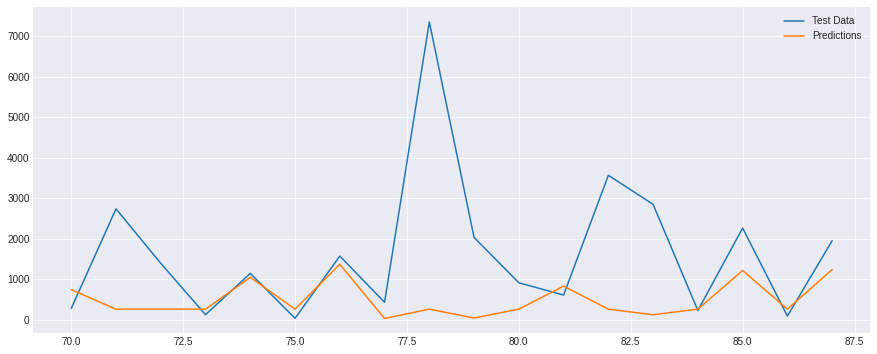

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(list(range(split_index,len(data))), test_data, label = 'Test Data')
plt.plot(list(range(split_index,len(data))), results, label = 'Predictions')
#plt.fill_between(range(split_index,len(data)), results - error, results + error, alpha = 0.5, color = 'red')
plt.legend()
plt.show()

In [ ]:
# Expanding data into tensors
tensor_train_data = tf.expand_dims(train_data, axis=-1)
tensor_test_data = tf.expand_dims(test_data, axis=-1)
tensor_train_dataset = data_generate(train_data, window_size, batch_size, shuffle_buffer)
tensor_test_dataset = data_generate(test_data, window_size, batch_size, shuffle_buffer)

In [ ]:
# Combination model of 1D CNN and LSTM
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 4s 4s/step - loss: 1168.1348 - mae: 1168.6348 - lr: 1.0000e-08
Epoch 2/100
1/1 [==============================] - 0s 85ms/step - loss: 1168.1348 - mae: 1168.6348 - lr: 1.1220e-08
Epoch 3/100
1/1 [==============================] - 0s 70ms/step - loss: 1168.1348 - mae: 1168.6348 - lr: 1.2589e-08
Epoch 4/100
1/1 [==============================] - 0s 64ms/step - loss: 1168.1348 - mae: 1168.6348 - lr: 1.4125e-08
Epoch 5/100
1/1 [==============================] - 0s 67ms/step - loss: 1168.1348 - mae: 1168.6348 - lr: 1.5849e-08
Epoch 6/100
1/1 [==============================] - 0s 66ms/step - loss: 1168.1348 - mae: 1168.6348 - lr: 1.7783e-08
Epoch 7/100
1/1 [==============================] - 0s 69ms/step - loss: 1168.1348 - mae: 1168.6348 - lr: 1.9953e-08
Epoch 8/100
1/1 [==============================] - 0s 67ms/step - loss: 1168.1348 - mae: 1168.6348 - lr: 2.2387e-08
Epoch 9/100
1/1 [==============================] - 0s 74ms/step - loss: 1168.1348 - ma

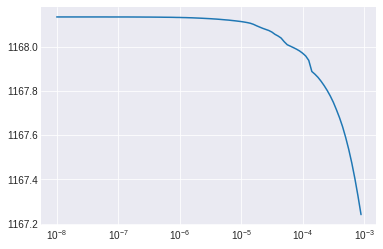

In [ ]:
# Using callbacks to optimize the learning rates
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(tensor_train_dataset, epochs=100, callbacks=[lr_schedule])
plt.semilogx(history.history["lr"], history.history["loss"])


Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 5s 5s/step - loss: 1167.1444 - mae: 1167.6444
Epoch 2/200
1/1 [==============================] - 0s 97ms/step - loss: 1167.1412 - mae: 1167.6412
Epoch 3/200
1/1 [==============================] - 0s 93ms/step - loss: 1167.1359 - mae: 1167.6359
Epoch 4/200
1/1 [==============================] - 0s 98ms/step - loss: 1167.1288 - mae: 1167.6288
Epoch 5/200
1/1 [==============================] - 0s 103ms/step - loss: 1167.1204 - mae: 1167.6204
Epoch 6/200
1/1 [==============================] - 0s 112ms/step - loss: 1167.1105 - mae: 1167.6105
Epoch 7/200
1/1 [==============================] - 0s 98ms/step - loss: 1167.0990 - mae: 1167.5990
Epoch 8/200
1/1 [==============================] - 0s 101ms/step - loss: 1167.0864 - mae: 1167.5864
Epoch 9/200
1/1 [==============================] - 0s 93ms/step - loss: 1167.0729 - mae: 1167.5729
Epoch 10/200
1/1 [==============================] - 0s 97ms/step - loss: 1167.0585 - mae: 1167.5585
Epoch 11/200
1/1 [==

KeyError: ignored

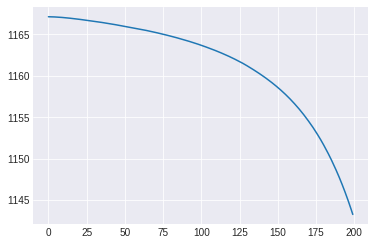

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(tensor_train_dataset, epochs=200, validation_data=tensor_test_dataset)
plt.plot(list(range(200)), history.history["loss"], label = "training_loss")
plt.plot(list(range(200)), history.history["val_loss"], label = "testing_loss")
plt.legend()
plt.show()


In [ ]:
def model_forecast(model, data, window_size):
    ds = tf.data.Dataset.from_tensor_slices(data)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast
  
rnn_forecast = model_forecast(model, data[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_index - window_size:-1, -1, 0]

In [ ]:
# Overall Error
error = tf.keras.metrics.mean_absolute_error(test_data, rnn_forecast).numpy()
print(error)

1620.2898


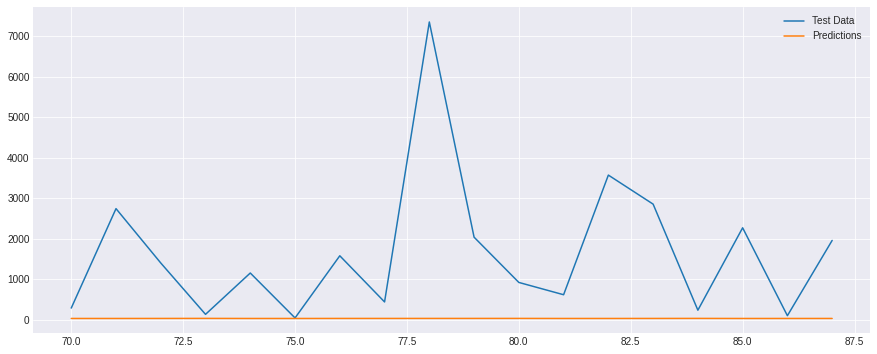

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(list(range(split_index,len(data))), test_data, label = 'Test Data')
plt.plot(list(range(split_index,len(data))), rnn_forecast, label = 'Predictions')
#plt.fill_between(range(split_index,len(data)), results - error, results + error, alpha = 0.5, color = 'red')
plt.legend()
plt.show()

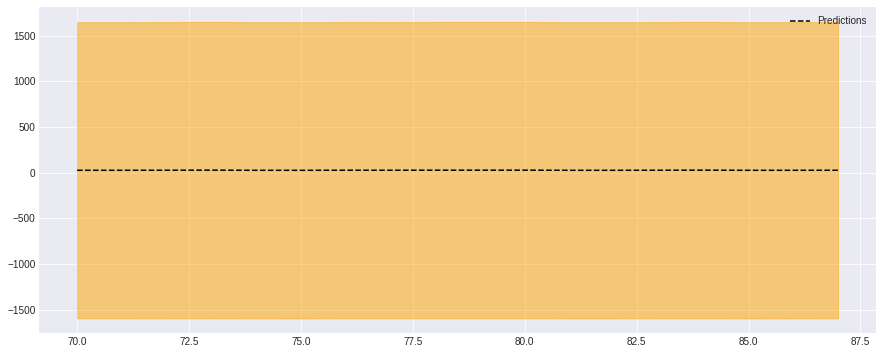

In [ ]:
plt.figure(figsize=(15, 6))
# Plotting with Confidence Intervals
#plt.plot(list(range(split_index,len(data))), test_data, label = 'Test Data')
plt.plot(list(range(split_index,len(data))), rnn_forecast, label = 'Predictions', color = 'k', linestyle = '--')
plt.fill_between(range(split_index,len(data)), rnn_forecast - error, rnn_forecast + error, alpha = 0.5, color = 'orange')
plt.legend()
plt.show()